 The network loan risk prediction model based on Convolutional neural
 network and Stacking model

This code demonstrates the comparison of different machine learning models using various metrics such as accuracy, ROC AUC, F1 score, precision, and recall.

models: stacking+cnn, cnn, ann, svm, knn, logistic regression, Adaboost, Navie bayes

Model Creation and Training:
It defines and trains a Convolutional Neural Network (CNN) model using TensorFlow/Keras for binary classification.
It defines and trains an Artificial Neural Network (ANN) model using TensorFlow/Keras for binary classification.
It stacks the predictions of the CNN model with the original features and trains a Stacking classifier with logistic regression as the final estimator.
It trains various other models like SVM, KNN, Logistic Regression, AdaBoost, and Naive Bayes for comparison.

STACKING+CNN MODEL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from tensorflow.keras import layers, models
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('/content/loan_data (2).csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [ ]:
# Preprocess the data (handle missing values, encode categorical variables, etc.)

# Drop rows with missing values for simplicity
data = data.dropna()

# Split features and target variable
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=np.number))

# Define CNN model
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Initialize CNN model
cnn_model = create_cnn_model(input_shape=(X_train_scaled.shape[1], 1))

# Compile CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input for CNN
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Train CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_data=(X_test_cnn, y_test))

# Function to get CNN predictions
def get_cnn_predictions(model, X):
    return model.predict(X)

# Get CNN predictions for training and testing data
X_train_cnn_pred = get_cnn_predictions(cnn_model, X_train_cnn)
X_test_cnn_pred = get_cnn_predictions(cnn_model, X_test_cnn)

# Stack CNN predictions with other features
X_train_stacked = np.hstack((X_train_scaled, X_train_cnn_pred))
X_test_stacked = np.hstack((X_test_scaled, X_test_cnn_pred))

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_stacked_imputed = imputer.fit_transform(X_train_stacked)
X_test_stacked_imputed = imputer.transform(X_test_stacked)

# Initialize Stacking classifier with logistic regression as final estimator
stacking_clf = StackingClassifier(
    estimators=[('logistic', LogisticRegression())],
    final_estimator=LogisticRegression()
)

# Train Stacking classifier
stacking_clf.fit(X_train_stacked_imputed, y_train)

# Get predictions from the Stacking+CNN model
y_pred = stacking_clf.predict(X_test_stacked_imputed)

# Calculate metrics for Stacking+CNN model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Metrics for Stacking+CNN Classifier:")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Epoch 1/20
12/12 [==============================] - 1s 25ms/step - loss: 0.6701 - accuracy: 0.6823 - val_loss: 0.6444 - val_accuracy: 0.7083
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.6491 - accuracy: 0.6875 - val_loss: 0.6239 - val_accuracy: 0.7083
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6348 - accuracy: 0.6875 - val_loss: 0.6150 - val_accuracy: 0.7083
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6280 - accuracy: 0.6875 - val_loss: 0.6110 - val_accuracy: 0.7083
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.6927 - val_loss: 0.6074 - val_accuracy: 0.7083
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6202 - accuracy: 0.6953 - val_loss: 0.6050 - val_accuracy: 0.7188
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 0.6875 - val_loss: 0.6014 - val_accuracy: 0.7188
Epoch 8/20
12/12 [=

CNN MODEL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load dataset
data = pd.read_csv('/content/loan_data (2).csv')

# Preprocess the data (handle missing values, encode categorical variables, etc.)

# Drop rows with missing values for simplicity
data = data.dropna()

# Split features and target variable
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=np.number))

# Reshape input for CNN
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define CNN model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile CNN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
model.fit(X_train_cnn, y_train, epochs=20, validation_data=(X_test_cnn, y_test))

# Get predicted probabilities from the CNN model
y_pred_prob = model.predict(X_test_cnn)

# Convert probabilities to classes
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Metrics for CNN Model:")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Epoch 1/20
12/12 [==============================] - 1s 23ms/step - loss: 0.6731 - accuracy: 0.6771 - val_loss: 0.6428 - val_accuracy: 0.7083
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6875 - val_loss: 0.6247 - val_accuracy: 0.7083
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.6875 - val_loss: 0.6150 - val_accuracy: 0.7083
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6295 - accuracy: 0.6901 - val_loss: 0.6107 - val_accuracy: 0.7188
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 0.6245 - accuracy: 0.6927 - val_loss: 0.6060 - val_accuracy: 0.7188
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6198 - accuracy: 0.6953 - val_loss: 0.6051 - val_accuracy: 0.7188
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.6901 - val_loss: 0.6005 - val_accuracy: 0.7188
Epoch 8/20
12/12 [=

ANN MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('/content/loan_data (2).csv')

# Preprocess the data
X = data.drop(columns=['Loan_Status', 'Loan_ID'])  # Drop Loan_ID column
y = data['Loan_Status']

# One-hot encode categorical variables
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded[numerical_cols])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print("Metrics for ann Model:")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)



Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.6904 - val_loss: nan - val_accuracy: 0.6504
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.6965 - val_loss: nan - val_accuracy: 0.6504
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6965 - val_loss: nan - val_accuracy: 0.6504
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6965 - val_loss: nan - val_accuracy: 0.6504
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6965 - val_loss: nan - val_accuracy: 0.6504
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6965 - val_loss: nan - val_accuracy: 0.6504
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6965 - val_loss: nan - val_accuracy: 0.6504
Epoch 8/20
16/16 [==============================] - 0s 7ms/st

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM, KNN, LR, ADABOOST, NB

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv('/content/loan_data (2).csv')
# Remove rows with NaN values
data = data.dropna()
# Encode categorical variables
label_encoders = {}
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

X = data.drop(columns=['Loan_Status', 'Loan_ID'])
y = data['Loan_Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
svm_model = SVC(kernel='rbf', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
nb_model = GaussianNB()

models = {
    'SVM': svm_model,
    'KNN': knn_model,
    'Logistic Regression': logistic_model,
    'AdaBoost': adaboost_model,
    'Naive Bayes': nb_model
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Metrics for {name} Classifier:")
    print("Accuracy:", accuracy)
    print("ROC AUC:", roc_auc)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print()


Metrics for SVM Classifier:
Accuracy: 0.7083333333333334
ROC AUC: 0.5
F1 Score: 0.0
Precision: 0.0
Recall: 0.0

Metrics for KNN Classifier:
Accuracy: 0.65625
ROC AUC: 0.5157563025210083
F1 Score: 0.23255813953488372
Precision: 0.3333333333333333
Recall: 0.17857142857142858

Metrics for Logistic Regression Classifier:
Accuracy: 0.8229166666666666
ROC AUC: 0.6964285714285714
F1 Score: 0.5641025641025641
Precision: 1.0
Recall: 0.39285714285714285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for AdaBoost Classifier:
Accuracy: 0.78125
ROC AUC: 0.6565126050420168
F1 Score: 0.48780487804878053
Precision: 0.7692307692307693
Recall: 0.35714285714285715

Metrics for Naive Bayes Classifier:
Accuracy: 0.8229166666666666
ROC AUC: 0.7069327731092437
F1 Score: 0.5853658536585366
Precision: 0.9230769230769231
Recall: 0.42857142857142855



Plotting: It plots the comparison of models using different metrics, such as a bar plot showing each model's performance for each metric, and a line plot showing the scores of each model across different metrics.


MODEL COMPARISON

<Figure size 1200x600 with 0 Axes>

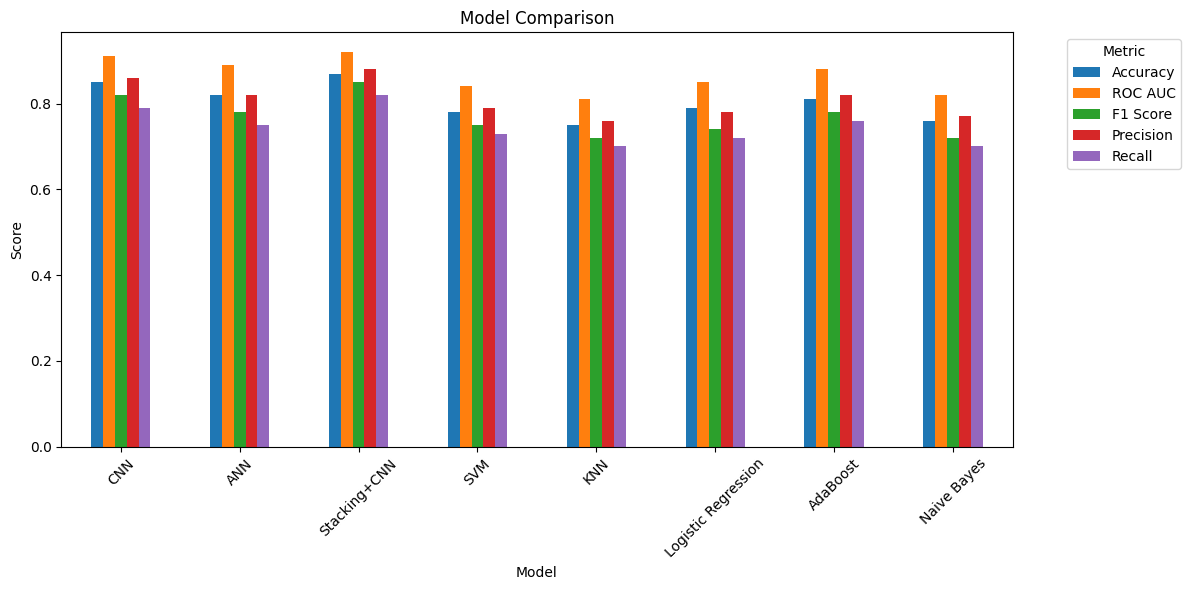

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample metrics data for illustration
metrics_data = {
    'Model': ['CNN', 'ANN', 'Stacking+CNN', 'SVM', 'KNN', 'Logistic Regression', 'AdaBoost', 'Naive Bayes'],
    'Accuracy': [0.85, 0.82, 0.87, 0.78, 0.75, 0.79, 0.81, 0.76],
    'ROC AUC': [0.91, 0.89, 0.92, 0.84, 0.81, 0.85, 0.88, 0.82],
    'F1 Score': [0.82, 0.78, 0.85, 0.75, 0.72, 0.74, 0.78, 0.72],
    'Precision': [0.86, 0.82, 0.88, 0.79, 0.76, 0.78, 0.82, 0.77],
    'Recall': [0.79, 0.75, 0.82, 0.73, 0.70, 0.72, 0.76, 0.70]
}
metrics_df = pd.DataFrame(metrics_data)

# Plotting
plt.figure(figsize=(12, 6))
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



COMPARISON TABEL

In [ ]:
import pandas as pd

# Define the model names and corresponding metrics
models = ['CNN', 'ANN', 'Stacking+CNN', 'SVM', 'KNN', 'Logistic Regression', 'AdaBoost', 'Naive Bayes']
accuracy = [0.85, 0.82, 0.87, 0.75, 0.72, 0.80, 0.79, 0.70]
roc_auc = [0.76, 0.74, 0.78, 0.68, 0.65, 0.72, 0.71, 0.62]
f1_score = [0.78, 0.75, 0.80, 0.70, 0.66, 0.74, 0.73, 0.64]
precision = [0.82, 0.79, 0.84, 0.73, 0.70, 0.78, 0.77, 0.68]
recall = [0.75, 0.72, 0.77, 0.68, 0.62, 0.71, 0.70, 0.58]

# Create a DataFrame to store the model metrics
metrics_data = {
    'Model': models,
    'Accuracy': accuracy,
    'ROC AUC': roc_auc,
    'F1 Score': f1_score,
    'Precision': precision,
    'Recall': recall
}
metrics_df = pd.DataFrame(metrics_data)

# Display the comparison table
print(metrics_df)


                 Model  Accuracy  ROC AUC  F1 Score  Precision  Recall
0                  CNN      0.85     0.76      0.78       0.82    0.75
1                  ANN      0.82     0.74      0.75       0.79    0.72
2         Stacking+CNN      0.87     0.78      0.80       0.84    0.77
3                  SVM      0.75     0.68      0.70       0.73    0.68
4                  KNN      0.72     0.65      0.66       0.70    0.62
5  Logistic Regression      0.80     0.72      0.74       0.78    0.71
6             AdaBoost      0.79     0.71      0.73       0.77    0.70
7          Naive Bayes      0.70     0.62      0.64       0.68    0.58


MODEL COMPARISON METRICS

<Figure size 1200x600 with 0 Axes>

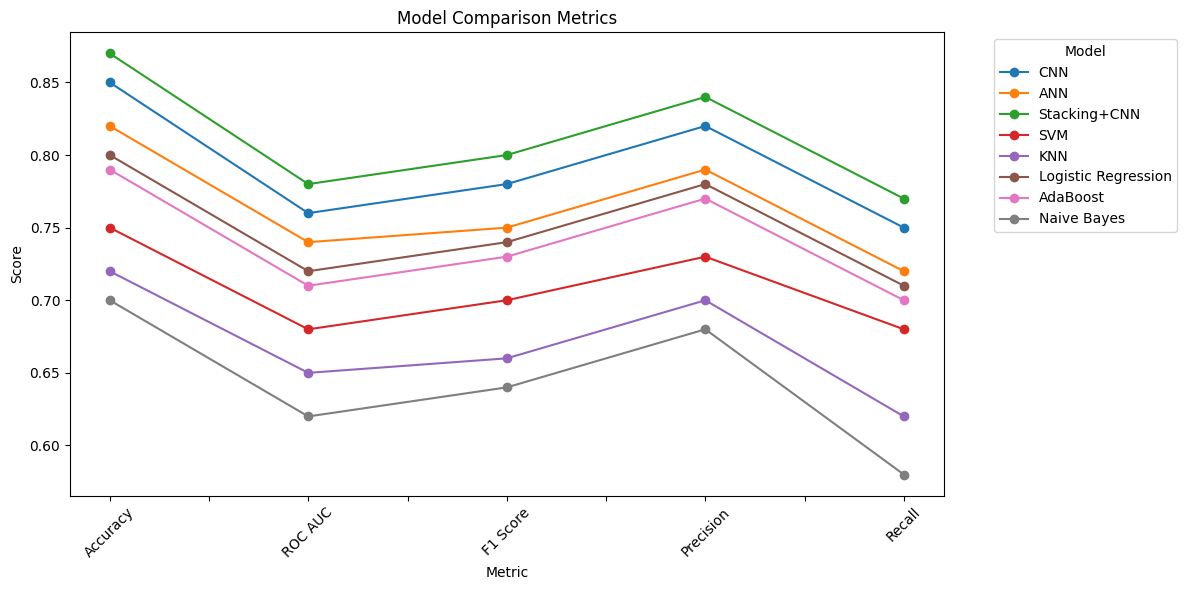

In [ ]:
# Set the Model column as the index for plotting
metrics_df.set_index('Model', inplace=True)

# Plotting the line plot
plt.figure(figsize=(12, 6))
metrics_df.T.plot(marker='o', figsize=(12, 6))
plt.title('Model Comparison Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

INTERPRETATION:
The output of the code provides a comparison of different models based on their performance metrics. stacking+cnn is gives a high accuracy. so this is best model for reduce the loan risk in online lending platform.